# INSTALL DEPENDENCIES

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 28.8 MB/s eta 0:00:00


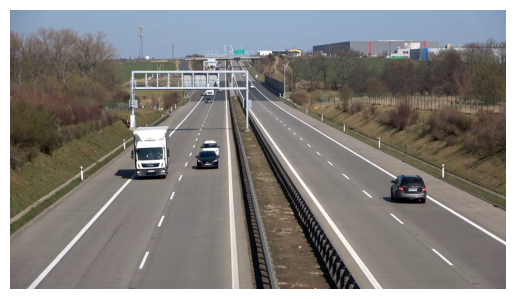

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load the video
video_path = '/kaggle/input/cars-traffic/3.mp4'
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    # Read the first frame from the video
    ret, frame = cap.read()

    # If frame is read correctly, ret will be True
    if ret:
        # Convert the frame from BGR (OpenCV default) to RGB
        image_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Display the frame using matplotlib
        plt.imshow(image_frame)
        plt.axis('off')  # Turn off axis
        plt.show()

    else:
        print("Error: Could not read a frame.")

# Release the video capture object
cap.release()

**YOLO V8 MODEL PREDICTION**

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 190MB/s]



0: 384x640 3 cars, 1 truck, 90.6ms
Speed: 11.3ms preprocess, 90.6ms inference, 249.8ms postprocess per image at shape (1, 3, 384, 640)


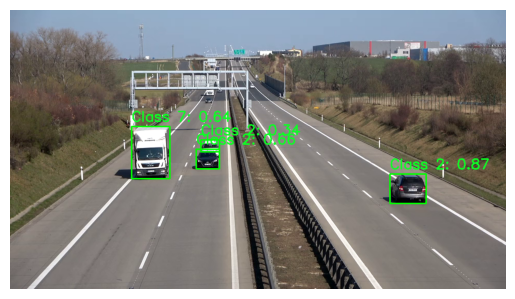

In [3]:
import torch
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')  # You can use 'yolov8n.pt', 'yolov8s.pt', or 'yolov8m.pt' depending on your needs

# Open video file and capture a frame
video_path = "/kaggle/input/cars-traffic/3.mp4"
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
cap.release()

if not ret:
    print("Failed to capture a frame from the video.")
else:
    # Perform object detection using YOLO
    results = model(frame)  # Detect objects in the frame

    # Render the results on the frame (draw bounding boxes)
    for result in results[0].boxes:
        # Get the bounding box coordinates
        x1, y1, x2, y2 = map(int, result.xyxy[0])  # Convert to integers
        confidence = result.conf[0]  # Confidence score
        class_id = int(result.cls[0])  # Class ID

        # Draw bounding box
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f"Class {class_id}: {confidence:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Convert frame back to RGB for displaying with matplotlib
    frame_rgb_with_boxes = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display the frame with detections using matplotlib
    plt.imshow(frame_rgb_with_boxes)
    plt.axis('off')  # Hide axis
    plt.show()

In [4]:
class_names = model.names  # This will give you a dictionary of class IDs and their corresponding names
print(class_names)


{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

**DETECTION TRANSFORMER (DETR)**

preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


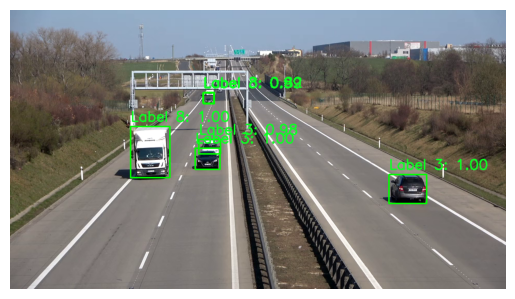

In [5]:
import torch
import cv2
import matplotlib.pyplot as plt
from transformers import DetrImageProcessor, DetrForObjectDetection

# Load the pre-trained DETR model and processor
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

# Open video file and capture a frame
video_path = "/kaggle/input/cars-traffic/3.mp4"
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
cap.release()

if not ret:
    print("Failed to capture a frame from the video.")
else:
    # Convert the captured frame from BGR (OpenCV format) to RGB (for DETR)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Preprocess the image
    inputs = processor(images=frame_rgb, return_tensors="pt")

    # Perform object detection
    with torch.no_grad():
        outputs = model(**inputs)

    # Post-process the results
    target_sizes = torch.tensor([frame_rgb.shape[:2]])
    results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.7)[0]

    # Draw bounding boxes around all detected objects
    for box, label, score in zip(results["boxes"], results["labels"], results["scores"]):
        x1, y1, x2, y2 = map(int, box.tolist())
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f"Label {label.item()}: {score:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Convert frame back to RGB for displaying with matplotlib
    frame_rgb_with_boxes = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display the frame with detections using matplotlib
    plt.imshow(frame_rgb_with_boxes)
    plt.axis('off')  # Hide axis
    plt.show()

In [6]:
# Assuming you're using a pretrained DETR model
from transformers import DetrForObjectDetection

model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")
labels = model.config.id2label  # This will return a dictionary mapping label IDs to object names
print(labels)

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{0: 'N/A', 1: 'person', 10: 'traffic light', 11: 'fire hydrant', 12: 'street sign', 13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse', 2: 'bicycle', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear', 24: 'zebra', 25: 'giraffe', 26: 'hat', 27: 'backpack', 28: 'umbrella', 29: 'shoe', 3: 'car', 30: 'eye glasses', 31: 'handbag', 32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard', 37: 'sports ball', 38: 'kite', 39: 'baseball bat', 4: 'motorcycle', 40: 'baseball glove', 41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle', 45: 'plate', 46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 5: 'airplane', 50: 'spoon', 51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange', 56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 6: 'bus', 60: 'donut', 61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed', 66: 'mirror', 67: 'dining table', 68: 'window', 69: 'desk', 7: 'train', 70: 'toi

**Faster R-CNN**

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 205MB/s]


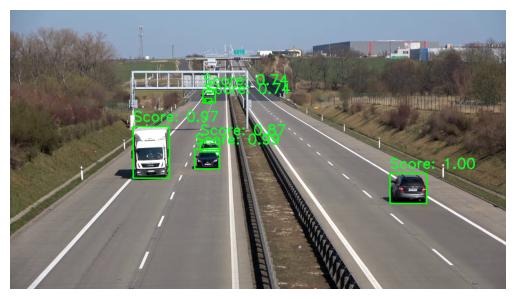

In [7]:
import torch
import cv2
import matplotlib.pyplot as plt
from torchvision import models, transforms

# Load the pre-trained Faster R-CNN model
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Open video file and capture a frame
video_path = "/kaggle/input/cars-traffic/3.mp4"
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
cap.release()

if not ret:
    print("Failed to capture a frame from the video.")
else:
    # Image preprocessing
    transform = transforms.Compose([transforms.ToTensor()])
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image_tensor = transform(frame_rgb).unsqueeze(0)

    # Perform object detection using Faster R-CNN
    with torch.no_grad():
        prediction = model(image_tensor)

    # Render the results on the frame (draw bounding boxes)
    for element in range(len(prediction[0]['boxes'])):
        box = prediction[0]['boxes'][element].numpy()
        score = prediction[0]['scores'][element].item()
        if score > 0.7:  # Filter predictions with low confidence
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"Score: {score:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Convert frame back to RGB for displaying with matplotlib
    frame_rgb_with_boxes = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display the frame with detections using matplotlib
    plt.imshow(frame_rgb_with_boxes)
    plt.axis('off')  # Hide axis
    plt.show()


**SSD (Single Shot Multibox Detector)**

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSDLite320_MobileNet_V3_Large_Weights.COCO_V1`. You can also use `weights=SSDLite320_MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssdlite320_mobilenet_v3_large_coco-a79551df.pth" to /root/.cache/torch/hub/checkpoints/ssdlite320_mobilenet_v3_large_coco-a79551df.pth
100%|██████████| 13.4M/13.4M [00:00<00:00, 174MB/s]


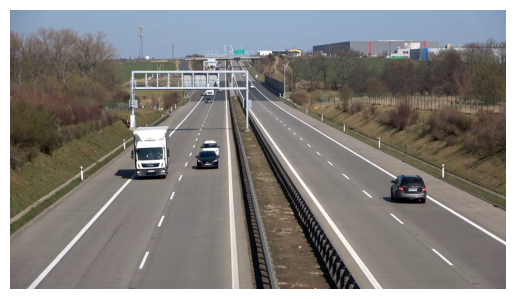

In [8]:
import torch
import cv2
import matplotlib.pyplot as plt
from torchvision import models, transforms
from PIL import Image

# Load the pre-trained SSD model
model = models.detection.ssdlite320_mobilenet_v3_large(pretrained=True)
model.eval()

# Open video file and capture a frame
video_path = "/kaggle/input/cars-traffic/3.mp4"
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
cap.release()

if not ret:
    print("Failed to capture a frame from the video.")
else:
    # Image preprocessing
    transform = transforms.Compose([transforms.ToTensor()])
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image_tensor = transform(frame_rgb).unsqueeze(0)

    # Perform object detection using SSD
    with torch.no_grad():
        prediction = model(image_tensor)

    # Render the results on the frame (draw bounding boxes)
    for element in range(len(prediction[0]['boxes'])):
        box = prediction[0]['boxes'][element].numpy()
        score = prediction[0]['scores'][element].item()
        if score > 0.5:  # Filter predictions with low confidence
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"Score: {score:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Convert frame back to RGB for displaying with matplotlib
    frame_rgb_with_boxes = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display the frame with detections using matplotlib
    plt.imshow(frame_rgb_with_boxes)
    plt.axis('off')  # Hide axis
    plt.show()


**RetinaNet**

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_coco-eeacb38b.pth" to /root/.cache/torch/hub/checkpoints/retinanet_resnet50_fpn_coco-eeacb38b.pth
100%|██████████| 130M/130M [00:00<00:00, 210MB/s]


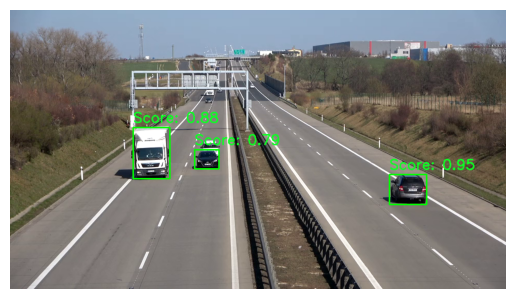

In [9]:
import torch
import cv2
import matplotlib.pyplot as plt
from torchvision import models, transforms
from PIL import Image

# Load RetinaNet model
model = models.detection.retinanet_resnet50_fpn(pretrained=True)
model.eval()

# Open video file and capture a frame
video_path = "/kaggle/input/cars-traffic/3.mp4"
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
cap.release()

if not ret:
    print("Failed to capture a frame from the video.")
else:
    # Image preprocessing
    transform = transforms.Compose([transforms.ToTensor()])
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image_tensor = transform(frame_rgb).unsqueeze(0)

    # Perform object detection using RetinaNet
    with torch.no_grad():
        prediction = model(image_tensor)

    # Render the results on the frame (draw bounding boxes)
    for element in range(len(prediction[0]['boxes'])):
        box = prediction[0]['boxes'][element].numpy()
        score = prediction[0]['scores'][element].item()
        if score > 0.7:  # Filter predictions with low confidence
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"Score: {score:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Convert frame back to RGB for displaying with matplotlib
    frame_rgb_with_boxes = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display the frame with detections using matplotlib
    plt.imshow(frame_rgb_with_boxes)
    plt.axis('off')  # Hide axis
    plt.show()


# COCO class names (80 object classes)
COCO_CLASSES = [
    'N/A', 'person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 
    'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 
    'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 
    'N/A', 'backpack', 'umbrella', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 
    'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 
    'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 
    'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'N/A', 
    'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 
    'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 
    'hair drier', 'toothbrush'
]

                                                     THE END